In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import geopandas as gpd
import os
import shapely
from shapely.geometry import LineString, Point
from shapely.ops import cascaded_union
import numpy as np
import time

from util import *

In [3]:
tax = pd.read_csv(r'yellow_tripdata_2016-01.csv',
                    usecols=['dropoff_longitude', 'dropoff_latitude', 'pickup_longitude', 'pickup_latitude'],
                    chunksize = 10000, dtype =np.float32, nrows = 30000)
trips = get_trips(tax.get_chunk())
man = get_zones()
joint = get_joint_grid(man, 0)

In [29]:
zones = gpd.read_file(r'taxi_zones\taxi_zones.shp')
zones = zones.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
temp = zones[zones.borough == 'Manhattan'].reset_index(inplace = False, drop = True)

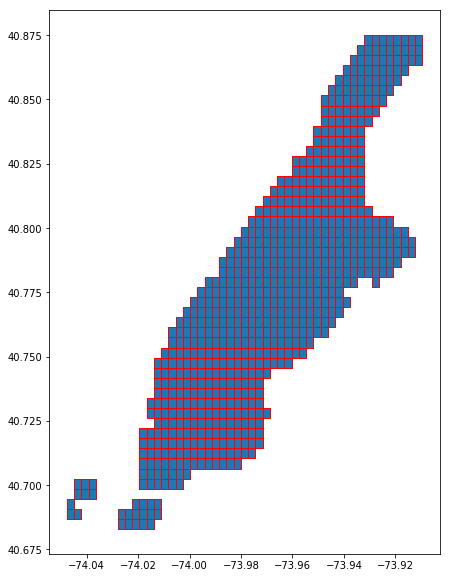

In [45]:
man = get_zones()
joint = get_joint_grid(man, 50, True)
c = aggregate_by_zone(trips, joint)

In [46]:
len(joint)

702

In [40]:
len(c[0])

7779

In [7]:
a = aggregate_by_zone(trips, joint)

In [13]:
len(a[0])

2629

In [30]:
b = aggregate_by_zone(trips,temp)

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [37]:
len(b[0])

7778

In [24]:
len(trips)

10000

In [26]:
man

,geometry
0,(POLYGON ((-73.95991723376321 40.6946635530692...


In [22]:
gpd.sjoin(man,trips, how="inner", op='contains')

,geometry,index_right,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,(POLYGON ((-73.95991723376321 40.6946635530692...,7233,-73.955360,40.807007,-73.949249,40.822983
0,(POLYGON ((-73.95991723376321 40.6946635530692...,3234,-73.954666,40.821003,-73.954666,40.821003
0,(POLYGON ((-73.95991723376321 40.6946635530692...,9991,-73.954666,40.821003,-73.954666,40.821003
0,(POLYGON ((-73.95991723376321 40.6946635530692...,6910,-73.954666,40.821003,-73.954666,40.821003
0,(POLYGON ((-73.95991723376321 40.6946635530692...,5741,-73.954666,40.821003,-73.954666,40.821003
0,(POLYGON ((-73.95991723376321 40.6946635530692...,2279,-73.944778,40.821289,-73.941780,40.824730
0,(POLYGON ((-73.95991723376321 40.6946635530692...,1389,-73.951401,40.804573,-73.953316,40.811977
0,(POLYGON ((-73.95991723376321 40.6946635530692...,7850,-73.955238,40.814789,-73.954704,40.805183
0,(POLYGON ((-73.95991723376321 40.6946635530692...,6060,-73.938164,40.813019,-73.945229,40.808270
0,(POLYGON ((-73.95991723376321 40.6946635530692...,7345,-73.951309,40.810287,-73.952179,40.812397


In [ ]:
b

In [ ]:
output = pd.read_csv('50000.csv')

In [ ]:
output[(- pd.isna(output.pu)) & (- pd.isna(output.do))]

In [ ]:
# def clean_up(df):
#     check1 = df.pu1.apply(lambda x: x>=-74.25495645300373 and x <=-73.70002020503291)
#     check2 = df.pu2.apply(lambda x: x>= 40.49787800728232 and x <= 40.91510319260628)
#     check3 = df.do1.apply(lambda x: x>=-74.25495645300373 and x <=-73.70002020503291)
#     check4 = df.do2.apply(lambda x: x>= 40.49787800728232 and x <= 40.91510319260628)
#     return check1 * check2 * check3 * check4

# class Trip():
#     def __init__(self, pu, do):
#         self.pu = pu
#         self.do = do

# class Transform():
#     def __init__(self):
#         self.count = 0
#     def __call__(self, x):
#         self.count +=1
#         return LineString([[x[0], x[1]], [x[2], x[3]]])

# transform = Transform()



# def find_zone(zones, point):
#     for i,zone in enumerate(zones):
#         if point.within(zone):
#             return i 
#     return -1

# def aggregate_by_zone(zones, trips):
#     n = len(zones)
#     outlier = []
#     transition = np.zeros((n,n))
#     for trip in trips:
#         if len(trip.boundary)>1:
#             pu_zone = find_zone(zones, trip.boundary[0])
#             if pu_zone == -1:
#                 outlier.append(trip)
#             else:
#                 do_zone = find_zone(zones, trip.boundary[1])
#                 if do_zone == -1:
#                     outlier.append(trip)
#                 else:
#                     transition[pu_zone, do_zone] += 1
#         else:
#             pass
#             #print(f'Check trip {trip}')
#     return transition, outlier


In [ ]:
def aggregate_by_zone2(zones, trips):
    #have to join individually because cannot find a way to find a field to join using geodataframe
    trips = trips[trips.geometry.apply(lambda x:len(x.boundary)>1)]
    trips.reset_index(inplace = True, drop = True)
    pu = gpd.GeoDataFrame(trips.geometry.apply(lambda x:x.boundary[0]))
    do = gpd.GeoDataFrame(trips.geometry.apply(lambda x:x.boundary[1]))
    pu_joined_zones = gpd.sjoin(zones,pu, how="right", op='contains')
    do_joined_zones = gpd.sjoin(zones,do, how="right", op='contains')
    agg = pd.concat([pu_joined_zones[['index_left']], do_joined_zones[['index_left']]],axis = 1, join = 'inner')
    agg.columns = ['pu', 'do']
    return agg,None
    #return agg[(-pd.isna(agg.do) & -pd.isna(agg.pu))], trips.loc[list(set(trips.index) - set(agg.index))]

def plot(zones, trips):
    fig, ax = plt.subplots(figsize = (15,15))
    zones.plot(ax=ax)
    trips.plot(ax = ax, color = 'red')

def get_zones():
    zones = gpd.read_file(r'taxi_zones\taxi_zones.shp')
    zones = zones.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
    temp = zones[zones.borough == 'Manhattan'].reset_index(inplace = False, drop = True)
    temp = gpd.GeoDataFrame(geometry = [cascaded_union(temp.geometry)])
    return gpd.GeoDataFrame(geometry = temp.rotate(36).geometry)

def get_joint_grid(zones, bins = 50, plot = False):
    long_set = np.arange(min(b.bounds[0] for b in zones.geometry), max(b.bounds[2] for b in zones.geometry), step = (max(b.bounds[2] for b in zones.geometry) - min(b.bounds[0] for b in zones.geometry))/bins) 
    long_set = [(long_set[i], long_set[i+1]) for i in range(len(long_set)-1)]
    lat_set =  np.arange(min(b.bounds[1] for b in zones.geometry), max(b.bounds[3] for b in zones.geometry), step = (max(b.bounds[3] for b in zones.geometry) - min(b.bounds[1] for b in zones.geometry))/bins) 
    lat_set = [(lat_set[i], lat_set[i+1]) for i in range(len(lat_set)-1)]
    grid = gpd.GeoDataFrame(geometry = [cascaded_union([Point(long[0], lat[0]),Point(long[1], lat[0]),Point(long[0], lat[1]),Point(long[1], lat[1])]).envelope for long in long_set for lat in lat_set])
    joint = gpd.sjoin(grid, zones, how = 'inner', op = 'intersects')
    joint.reset_index(drop = True, inplace = True)
    joint.drop(['index_right'],axis = 1, inplace =True)
    if plot:
        fig, ax = plt.subplots(figsize = (10,10)) 
        joint.plot(**{'edgecolor': 'red'}, ax = ax)
    return joint

In [ ]:
man = get_zones()
joined = get_joint_grid(man, 50)
joined.head()

In [ ]:
joined.head()

In [ ]:
tax = pd.read_csv(r'yellow_tripdata_2016-01.csv',usecols=['dropoff_longitude', 'dropoff_latitude', 'pickup_longitude', 'pickup_latitude'],chunksize = 50000, dtype =np.float32)

In [ ]:
transitions = []
outliers = []
i = 0
for tax_sample in tax:
    time0 = time.time()
    i += 1
    #tax_sample.columns = ['pu1' , 'pu2', 'do1', 'do2']
    trips = gpd.GeoDataFrame(geometry = tax_sample.apply(lambda x:LineString([[x[0], x[1]], [x[2], x[3]]]), axis = 1))
    #transition, outlier = aggregate_by_zone(list(man.geometry), list(trips.geometry))
    transition, outlier = aggregate_by_zone2(man, trips)
    transitions.append(transition)
    #outliers.extend(outlier)
    print(f'{i}:{time.time()-time0}')
    #if i == 1:
    #    break

In [ ]:
import multiprocessing as mp
import sys 
i = 0
transitions = []
def process(tax_sample):
    time0 = time.time()
    trips = gpd.GeoDataFrame(tax_sample, geometry = tax_sample.apply(lambda x:LineString([[x[0], x[1]], [x[2], x[3]]]), axis = 1))
    transition, outlier = aggregate_by_zone2(man, trips)
    transitions.append(transition)
    print(f'{i}:{time.time()-time0}')
    sys.stdout.flush()
    return transitions


pool = mp.Pool(4)
funclist = []
transitions = []

tax = pd.read_csv(r'yellow_tripdata_2016-01.csv',usecols=['dropoff_longitude', 'dropoff_latitude', 'pickup_longitude', 'pickup_latitude'],chunksize = 10000, dtype =np.float32, nrows = 30000)
i = 0
for tax_sample in tax:
    i = i + 1
    print(i)
    f = pool.apply_async(process, [tax_sample])
    funclist.append(f)
for f in funclist:
    transitions.append(f.get(timeout = 60))

In [ ]:
pool.

In [ ]:
mp

In [ ]:
import dask.dataframe as dd
from dask.distributed import Client

In [ ]:
client = Client()
client

In [ ]:
i = 0
transitions = []
from dask import delayed
def process(tax_sample):
    time0 = time.time()
    trips = gpd.GeoDataFrame(tax_sample, geometry = tax_sample.apply(lambda x:LineString([[x[0], x[1]], [x[2], x[3]]]), axis = 1))
    transition, outlier = aggregate_by_zone2(man, trips)
    transitions.append(transition)
    print(f'{i}:{time.time()-time0}')
    sys.stdout.flush()
    return transitions

tax = dd.read_csv(r'yellow_tripdata_2016-01.csv',usecols=['dropoff_longitude', 'dropoff_latitude', 'pickup_longitude', 'pickup_latitude'],blocksize = 10000)
result = delayed(process)(tax)
transitions = client.compute(result)

In [ ]:
dd.read_csv??

In [ ]:
client.compute()

In [ ]:
pool.apply_async??

In [ ]:
transitions.__dir__()

In [ ]:
transitions

In [ ]:
pool.apply_async??

In [ ]:
len(transitions)

In [ ]:
t = pd.concat(transitions,axis = 0)

In [ ]:
t

In [ ]:
t['count'] = 1
t.groupby(['pu', 'do']).count().to_csv(r'temp.csv')

In [ ]:
trips = trips[trips.geometry.apply(lambda x:len(x.boundary)>1)]
trips.reset_index(inplace = True, drop = True)
pu = gpd.GeoDataFrame(trips.geometry.apply(lambda x:x.boundary[0]))
do = gpd.GeoDataFrame(trips.geometry.apply(lambda x:x.boundary[1]))
pu_joined_zones = gpd.sjoin(zones, pu, how="right", op='contains').sort_index()
do_joined_zones = gpd.sjoin(zones, do, how="right", op='contains').sort_index()
agg = pd.concat([pu_joined_zones[['LocationID']], do_joined_zones[['LocationID']]],axis = 1, join = 'inner')
agg.columns = ['pu', 'do']
agg = agg[(-pd.isna(agg.do) & -pd.isna(agg.pu))]

In [ ]:
agg[(-pd.isna(agg.do) & -pd.isna(agg.pu))]

In [ ]:
agg[list(agg.notna().product(axis = 1))]

In [ ]:
agg['count'] = 1

In [ ]:
agg.groupby(['pu', 'do'])['count'].count()

In [ ]:
trips.head()

In [ ]:
agg = pd.concat([pu_joined_zones[['LocationID']], do_joined_zones[['LocationID']]],axis = 1, join = 'inner')
agg.columns = ['pu', 'do']
agg

In [ ]:
do_joined_zones.shape

In [ ]:
pu_joined_zones[['index_left']]

In [ ]:
pu_joined_zones.head()

In [ ]:
do_joined_zones.head()

In [ ]:
t = gpd.sjoin(man, pu, how="right", op='contains')

In [ ]:
man[man.index == 2]

In [ ]:
plot(man, t[t.index_left == 7])

In [ ]:
plot(man.loc[[0.0, 6.0, 13.0, 21.0, 29.0, 32.0, 40.0, 42.0, 45.0, 51.0, 53.0],],trips.loc[[1071946],])

In [ ]:
trips = gpd.GeoDataFrame(tax_sample, geometry = list(tax_sample.apply(lambda x:transform(x), axis = 1)))

In [ ]:
trips.loc[1071946,]

In [ ]:
t = gpd.sjoin(man, trips, how="right", op='intersects')

In [ ]:
gpd.jo

In [ ]:
list(t.loc[1071946].index_left)

In [ ]:
for i in range(5):
    if i == 3:
        
    print(i)

In [ ]:
list(trips.geometry)[1].boundary[0]

In [ ]:
man.plot()

In [ ]:
transitions = []
outliers = []
i = 0
for tax_sample in tax:
    time0 = time.time()
    i += 1
    #tax_sample.columns = ['pu1' , 'pu2', 'do1', 'do2']
    trips = gpd.GeoDataFrame(tax_sample, geometry = list(tax_sample.apply(lambda x:transform(x), axis = 1)))
    #trips = trips[trips.geometry.apply(lambda x:len(x.boundary)>1)]
    #trips = trips[trips.geometry.apply(lambda x: find_zone([boundary], x.boundary[0]) != -1)]
    #trips = trips[trips.geometry.apply(lambda x: find_zone([boundary], x.boundary[1]) != -1)]
    transition, outlier = from_zone_to_transition_matrix(list(man.geometry), list(trips.geometry))
    transitions.append(transition)
    outliers.extend(outlier)
    print(f'{i}:{time.time()-time0}')

In [ ]:
transitions[3].sum()

In [ ]:
outli

In [ ]:
LineString([[-73.90517425537109, 40.85726928710938], [-73.90517425537109, 40.85726928710938]])

In [ ]:
np.argmax(transition[0][0].sum(axis = 1))

In [ ]:
np.argmax(transition[0][0].sum(axis = 0))

In [ ]:
man[45:46]

In [ ]:
zones[zones.borough == 'Manhattan']

In [ ]:
transition[0].sum(axis = 1)

In [ ]:
new_geo = pd.concat(geo)

In [ ]:
del(new_geo)

In [ ]:
geo.info()

In [ ]:
boundary = gpd.GeoSeries(cascaded_union(list(man.geometry)))[0]
geo = geo[geo.geometry.apply(lambda x: (x.boundary[0].within(boundary) and x.boundary[1].within(boundary)) if len(x.boundary)>1 else False)]     

In [ ]:
geo.to_csv(r'temp.csv',index = False)

In [ ]:
new_geo = gpd.GeoDataFrame(pd.read_csv(r'temp.csv'))

In [ ]:
new_geo.head()

In [ ]:
sum(sort)

In [ ]:
geo.geometry[324:325].apply(lambda x: x.boundary[0].within(boundary) and x.boundary[1].within(boundary))

In [ ]:
def within_boundary(x):
    return x.within(boundary)

In [ ]:
zone.geometry

In [ ]:
shape =
gpd.read_file(r'NYC Street Centerline (CSCL)\geo_export_1daa279c-aa85-4c43-b7ea-d5939a43054b.shp')


In [ ]:
zone = gpd.read_file(r'taxi_zones\taxi_zones.shp')

zone = zone.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

man= zone[zone.borough == 'Manhattan']

In [ ]:
man.plot(figsize = (20,20))

In [ ]:
man
def divide(polygon,shape):
    polygon

In [ ]:
list(zone.geometry[0].exterior.coords)

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
#shape.plot(ax = ax, alpha = 0.4)
manhattan.plot(ax=ax)
geo_df.plot(ax = ax, color = 'red')

In [ ]:
def define_grid():
    

In [ ]:
plt.hist(tax.pu1, range=[-85,-75],bins = 20)

In [ ]:
plt.hist(tax.pu2,range = [40.5,41], bins = 200)

In [ ]:
tax.pu2.min(axis = 0)

In [ ]:
plt.hist(tax.pu2, range=[-85,-75],bins = 20)

In [ ]:
taxi3.head()

In [ ]:
taxi.columns = ['PU', 'DO']

In [ ]:
len(taxi.PU.unique())

In [ ]:
taxi.shape